In [1]:
#!/usr/bin/env python
# coding: utf-8

import csv
import numpy as np
import matplotlib.pyplot as plt

#data processing
with open("data_1.csv") as fo:
    data1 = csv.reader(fo)
    X = [[]]
    y = []
    for row in data1:
        if(row[0] == "x"): continue
        X.append([pow(float(row[0]), i) for i in range(0,10)])
        y.append([float(row[1])])
    X = X[1:]
    X = np.array(X)
    y = np.array(y)


train_n = int(len(X)*0.7)
train_X = X[:train_n]
train_y = y[:train_n]
test_X = X[train_n:]
test_y = y[train_n:]

#training

learning_rate = 0.1
epoch = 1000

def calc_pred(w, x):
    return np.matmul(x, w)

def calc_error(p, y):
    return np.add.reduce((p-y)*(p-y))/(2*len(p))

def calc_grad(w, x, t, C):
    dedw = np.asarray([(-(t-np.matmul(x, w))*x[wi]+C*w[wi]) for wi in range(len(w))])
    return dedw


#do gradient descent:
node_in = 10
node_out = 1

stat = []

for lnC in range(-5, -10, -1):
    C = np.exp(lnC)
    W = np.random.randn(node_in, node_out) / np.sqrt(node_in / 2)
    for ep_i in range(1, epoch+1):
        p = calc_pred(W, train_X)
        for g_i in range(len(train_X)):
            W -= learning_rate*calc_grad(W, train_X[g_i], train_y[g_i][0], C)
        if(ep_i%50 == 0):
            print("training error now = {}".format(calc_error(p, train_y)))
    test_error = calc_error(calc_pred(W, test_X), test_y)
    print("final error on test data = {}".format(test_error))
    stat.append(test_error)
    

plt.figure()
xs = range(-5, -10, -1)
ys = stat
plt.plot(xs,ys)
plt.xlabel("lnC")
plt.ylabel("RMS Error")
plt.title("lnC-RMS graph".format(9, learning_rate, C))
plt.show()



training error now = [0.11533177]
training error now = [0.11459786]
training error now = [0.11455403]
training error now = [0.11455119]
training error now = [0.11455099]
training error now = [0.11455098]
training error now = [0.11455098]
training error now = [0.11455098]
training error now = [0.11455098]
training error now = [0.11455098]
training error now = [0.11455098]
training error now = [0.11455098]
training error now = [0.11455098]
training error now = [0.11455098]
training error now = [0.11455098]
training error now = [0.11455098]
training error now = [0.11455098]
training error now = [0.11455098]
training error now = [0.11455098]
training error now = [0.11455098]
final error on test data = [0.08351793]
training error now = [0.10041676]
training error now = [0.0973471]
training error now = [0.09663668]
training error now = [0.0964568]
training error now = [0.09640908]
training error now = [0.09639574]
training error now = [0.09639177]
training error now = [0.0963905]
training er

<Figure size 640x480 with 1 Axes>

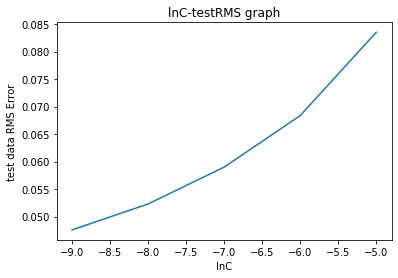

In [3]:
plt.figure()
xs = range(-5, -10, -1)
ys = stat
plt.plot(xs,ys)
plt.xlabel("lnC")
plt.ylabel("test data RMS Error")
plt.title("lnC-testRMS graph")
plt.show()
